<a href="https://colab.research.google.com/github/eranCat/TitanicML/blob/main/TitanicMLDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [54]:
df_train = pd.read_csv('titanic_train.csv')

In [55]:
df_train['Sex'].value_counts()

Sex
1    456
0    256
Name: count, dtype: int64

#בדיקת סוגי משתנים
נבדוק אילו איזה סוגי משתנים יש לנו

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [57]:
pclass = df_train['Pclass'].unique()
sibsp = df_train['SibSp'].unique()
parch = df_train['Parch'].unique()
sibsp.sort()
print("pclass: ", pclass)
print("sibsp: ", sibsp)
print("parch: ", parch)

pclass:  [1 2 3]
sibsp:  [0 1 2 3 4 5 8]
parch:  [0 1 2 3 4 5 6]


סוגי המשתנים:


*   Pclass - משתנה שמי
*   SibSp - משתנה רווח
*   Parch - משתנה רווח



#בדיקת חריגות

נבדוק אם אין לנו נתונים חסרים על ידי בדיקה בפונקציית describe

In [58]:
df_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [59]:
kidsSurvived=0
for i in range(712):
    if (df_train['Age'][i]<=18) and (df_train['Survived'][i]==1):
        kidsSurvived+=1
print(kidsSurvived)

56


In [60]:
menSurvived=0
for i in range(712):
    if (df_train['Sex'][i] == 1)and (df_train['Age'][i]>18) and (df_train['Survived'][i]==1):
        menSurvived+=1
print(menSurvived)

69


In [61]:
womenSurvived=0
for i in range(712):
    if (df_train['Sex'][i] == 0)and (df_train['Age'][i]>18) and (df_train['Survived'][i]==1):
        womenSurvived+=1
print(womenSurvived)

156


In [62]:
sum = womenSurvived+menSurvived+kidsSurvived
print("sum: ",sum)
if sum == (df_train['Survived']==1).sum():
    print("True")
else:
    print("False")

sum:  281
True


In [63]:
df_train['Survived'].value_counts()

Survived
0    431
1    281
Name: count, dtype: int64

In [64]:
'''def min_max_scale(series, feature_range=(1, -1)):
    min_val = series.min()
    max_val = series.max()
    scale = (feature_range[1] - feature_range[0]) / (max_val - min_val)
    scaled_series = scale * (series - min_val) + feature_range[0]
    return scaled_series'''

'def min_max_scale(series, feature_range=(1, -1)):\n    min_val = series.min()\n    max_val = series.max()\n    scale = (feature_range[1] - feature_range[0]) / (max_val - min_val)\n    scaled_series = scale * (series - min_val) + feature_range[0]\n    return scaled_series'

In [19]:
df_train['Age'] = min_max_scale(df_train['Age'])
df_train['Fare'] = min_max_scale(df_train['Fare'])
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,-0.344510,1,0,-0.694467,1,1
1,2,0,-0.117610,0,0,-0.947300,0,1
2,3,1,0.512669,0,0,-0.962914,0,0
3,3,1,0.109290,0,0,-0.969177,0,0
4,3,1,0.462246,0,0,-0.968575,0,0
...,...,...,...,...,...,...,...,...
707,1,1,-0.344510,0,0,-0.797542,0,0
708,3,1,0.663935,5,2,-0.816915,0,0
709,2,0,0.865625,0,1,-0.871177,0,1
710,2,1,0.268143,0,0,-1.000000,0,0


In [21]:
def EuclideanDist(pointA,PointB):
    vector_len=len(pointA)
    sum=0
    for i in range(vector_len):
        diff = pointA[i]-pointB[i]
        diff**2
        sum+=diff
    return np.sqrt(sum)

In [22]:
def ManhattanDist(pointA,pointB):
    vector_len=len(pointA)
    sum=0
    for i in range(vector_len):
        diff = np.abs(pointA[i]-pointB[i])
        sum+=diff
    return sum

In [32]:
def ChebyshevDist(pointA,pointB):
    vector_len = len(pointA)
    d=[]
    for i in range(vector_len):
        diff = pointA[i]-pointB[i]
        d.append(diff)
    return min(d)

In [34]:
def KNN(pointA, Dataset, metric, data_label, label, k):
    dist_vector = pd.Series(Dataset.index)
    sum=0
    if metric == 1:
        for i in Dataset.index:
            dist_vector[i] = ManhattanDist(pointA,Dataset.loc[i])
    elif metric == 2:
        for i in Dataset.index:
            dist_vector[i] = EuclideanDist(pointA,Dataset.loc[i])
    else:
        for i in Dataset.index:
            dist_vector[i] = ChebyshevDist(pointA,Dataset.loc[i])
    k_nearest = dist_vector.sort_values()[:k]
    for i in k_nearest.index:
        sum += data_label[label][i]
    if sum >= k/2:
        return 1
    else:
        return 0

In [66]:
x_feature = df_train[['Age','Sex','Fare','Embarked']]
y_label = df_train['Survived']
y_label

0      1
1      1
2      0
3      0
4      0
      ..
707    0
708    0
709    1
710    0
711    0
Name: Survived, Length: 712, dtype: int64

In [45]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,-0.344510,1,0,-0.694467,1,1
1,2,0,-0.117610,0,0,-0.947300,0,1
2,3,1,0.512669,0,0,-0.962914,0,0
3,3,1,0.109290,0,0,-0.969177,0,0
4,3,1,0.462246,0,0,-0.968575,0,0


In [82]:
df_test = pd.read_csv('titanic_test.csv')
x_test = df_test[['Age','Sex','Fare','Embarked']]
y_test = df_test['Survived']

In [83]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_feature,y_label)
y_predict = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
print("accuracy: ", accuracy)

accuracy:  0.7486033519553073


In [88]:
neighbors = np.arange(1, 100)
accuracy_scores=[]
for n in neighboars:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_feature,y_label)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

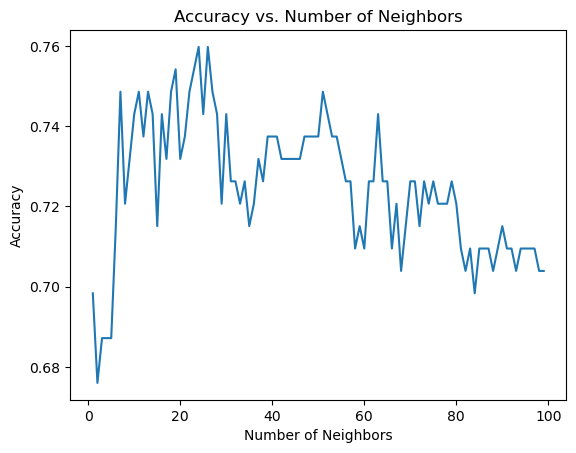

In [90]:
plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()